In [1]:
# Загружаем библиотеки:
# для работы с математикой
import numpy as np
# для построения графиков
import matplotlib.pyplot as plt 
# для понижения размерности данных
from sklearn.decomposition import PCA
# для расчёта производных
from scipy.misc import derivative
# для оптимизации
from scipy.optimize import differential_evolution

### Задание 1

In [2]:
# Исходные данные
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

#### 1a

In [3]:
print('(x, y), где y - наиболее похожий пользователь на пользователя x')

# Переменная для записи величины косинуса между текущим вектором пользователя и каждым из всего списка пользователей
cos_sim = [0] * len(raitings)
# Перебираем строки матрицы - это соответствует векторам каждого пользователя
for current_user_number in range(len(raitings)):
    # Вектор выбранного пользователя
    current_user_vector = raitings[current_user_number, :]
    
    # Выбираем других пользователей для сравнения
    for opposite_user_number in range(len(raitings)):
        # Вектор другого пользователя
        opposite_user_vector = raitings[opposite_user_number, :]
        # Показатель косинусного сходства между векторами двух пользователей
        cos_sim[opposite_user_number] = np.dot(current_user_vector, opposite_user_vector)/(np.linalg.norm(current_user_vector) * np.linalg.norm(opposite_user_vector))
    
    # Сортируем по убыванию список значний косинуса между векторами
    # Берём второе по величине значение, так как косинус для вектора с сами же собой равен 1
    position = cos_sim.index(sorted(cos_sim, reverse=True)[1])
    print(f'({current_user_number + 1}, {position + 1})')  

(x, y), где y - наиболее похожий пользователь на пользователя x
(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


#### 1b

In [4]:
# Для сжатия исходных данных используем PCA
pca = PCA(n_components = 5)
# Применяем к нашим данным
raitings_pca = pca.fit_transform(raitings)
print('Результат сжатия до 5 признаков:\n', raitings_pca)

Результат сжатия до 5 признаков:
 [[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.01456742 -1.89512837  6.54883538]
 [-5.7843488   5.29857107 -1.48083611 -3.71295542  0.21312695]
 [-7.2835739  -3.51729118  1.03318766 -5.34915166 -4.43127987]]


### Задание 2

Задание: посчить значение первой и второй производной функции
$$    
f(x) = tg^2(sin(x) + cos(2x+3))
$$
Производная
$$
f'(x) = 2tg(sin(x) + cos(2x+3))\cdot(tg(sin(x) + cos(2x+3)))' =
$$

$$
= \frac{2tg(sin(x) + cos(2x+3))\cdot((sin(x))' + (cos(2x+3))')}{cos^2(sin(x) + cos(2x+3))} =
$$

$$
= \frac{2tg(sin(x) + cos(2x+3))\cdot(cos(x) - 2sin(2x+3))}{cos^2(sin(x) + cos(2x+3))}
$$

In [5]:
# Точка для расчёта значения фцнкций
x = 1
# Исходная функция
def f(x):
    return np.tan(np.sin(x) + np.cos(2 * x + 3)) ** 2
# Производная
result = (2 * np.tan(np.sin(x) + np.cos(2 * x + 3)) * (np.cos(x) - 2 * np.sin(2 * x + 3))) / (np.cos(np.sin(x) + np.cos(2 * x + 3)) ** 2)
print(f'Расчётное значение производной в точке х = {x} составляет {round(result, 3)}, а наденное с помощью библиотеки scipy составляет {round(derivative(f, x, n = 1, dx = 1e-6), 3)}')

Расчётное значение производной в точке х = 1 составляет 55.386, а наденное с помощью библиотеки scipy составляет 55.386


### Задание 3

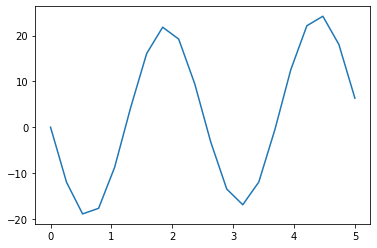

In [6]:
# Исходные данные
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])
plt.plot(x, fx)
plt.show()
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

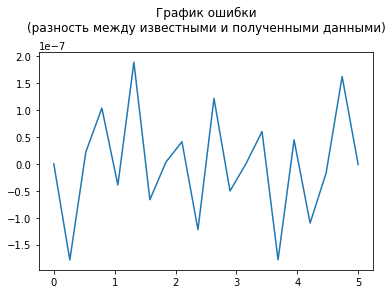

Значения параметров:
a = 3.0
b = -2.5


In [7]:
# Для нахождения параметров используем дифференциальную эволюцию
res = differential_evolution(error, [(-5, 5), (-5, 5)])
a = res['x'][0]
b = res['x'][1]
# Проверяем результат
plt.plot(x, fx - f(x, a, b))
plt.title('График ошибки\n(разность между известными и полученными данными)\n')
plt.show()
print(f'Значения параметров:\na = {round(a, 2)}\nb = {round(b, 2)}')

### Задание 4

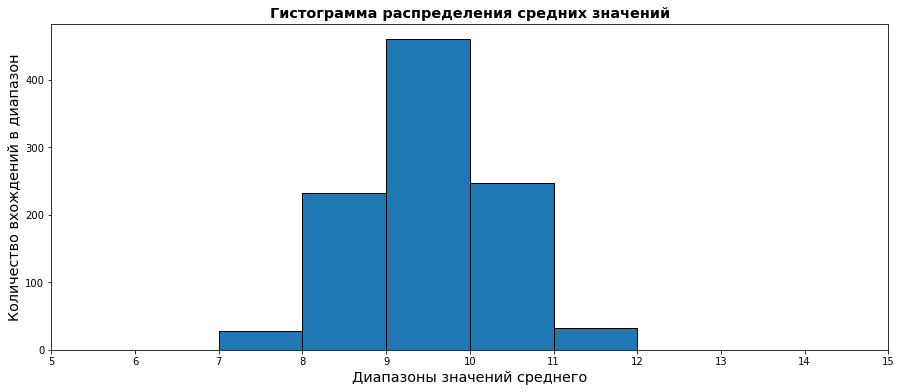

In [11]:
# Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. 
# Создадим массив, каждая строка - это отдельная выборка
data = np.random.randint(0, 20, size = (1000, 50))
# Для каждой выборки-строки считаем среднее
row_mean = np.mean(data, axis = 1)
# Строим гистограмму
plt.figure(figsize=(15, 6))
plt.hist(row_mean, bins = range(5, 15), edgecolor = 'black')
plt.xlim(5, 15) # Наши значения лежат в пределах от 2 до 8, нет смысла отображать пустые интервалы
plt.xticks(range(5, 16))
plt.title('Гистограмма распределения средних значений', fontsize = 'x-large', fontweight = 'bold')  
plt.ylabel('Количество вхождений в диапазон', fontsize = 'x-large')
plt.xlabel('Диапазоны значений среднего', fontsize = 'x-large')
plt.show()

### Задание 5

Найдти собственные значения и собственные векторы матрицы
$$
A = \begin{pmatrix}
1&4\\
1&1
\end{pmatrix}
$$  
Находим собственные значения из характеристического уравнения
$$
|A - \lambda I| = 
\begin{vmatrix}
1 - \lambda&4\\
1&1 -\lambda
\end{vmatrix} = 0
$$  
$$
\lambda^2 - 2\lambda - 3 = 0
$$
$$
\lambda_1 = -1, \lambda_2 = 3
$$
Собственные векторы для собственных значений:  
- для $\lambda_1 = -1 $
$$
2x + 4y = 0 \rightarrow x = -2y
$$
$$
v_1 = \begin{pmatrix}
1\\
-0.5
\end{pmatrix} 
$$
- для $\lambda_2 = 3 $
$$ -2x + 4y = 0 \rightarrow x = 2y $$ 
$$
v_2 = \begin{pmatrix}
1\\
0.5
\end{pmatrix} 
$$


In [9]:
m = np.array([[1, 4],
              [1, 1]])
w, v = np.linalg.eig(m)
print(f'Собственное значение λ1 = {round(w[0], 3)}, собственный вектор {np.round(v[:,0], 3)}')
print(f'Собственное значение λ2 = {round(w[1], 3)}, собственный вектор {np.round(v[:,1], 3)}')

Собственное значение λ1 = 3.0, собственный вектор [0.894 0.447]
Собственное значение λ2 = -1.0, собственный вектор [-0.894  0.447]
